# Setup of Noteboook

The follwing code clones the github repository with course files. 
Subsequently it imports all libraries and custom modules needed for this notebook

In [1]:
!git clone https://github.com/DataHow/analytics-course-scripts.git

Cloning into 'analytics-course-scripts'...
remote: Enumerating objects: 458, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 458 (delta 8), reused 12 (delta 3), pack-reused 440
Receiving objects: 100% (458/458), 14.55 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (279/279), done.


In [2]:
# import libaries
import pandas as pd
import numpy as np
import scipy
import importlib  
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from scipy.stats import chi2

# import custom modules
simulator = importlib.import_module("analytics-course-scripts.scripts.modules.simulator")
plothelpers = importlib.import_module("analytics-course-scripts.scripts.modules.plothelpers")

# Principal Component Analysis

Find data underlying dimension that suffices to capture the information in the data, i.e., the latent variables.

We want to compress the information into a defined number of latent variables, such that `n_latent` $<$ `n_variables` .

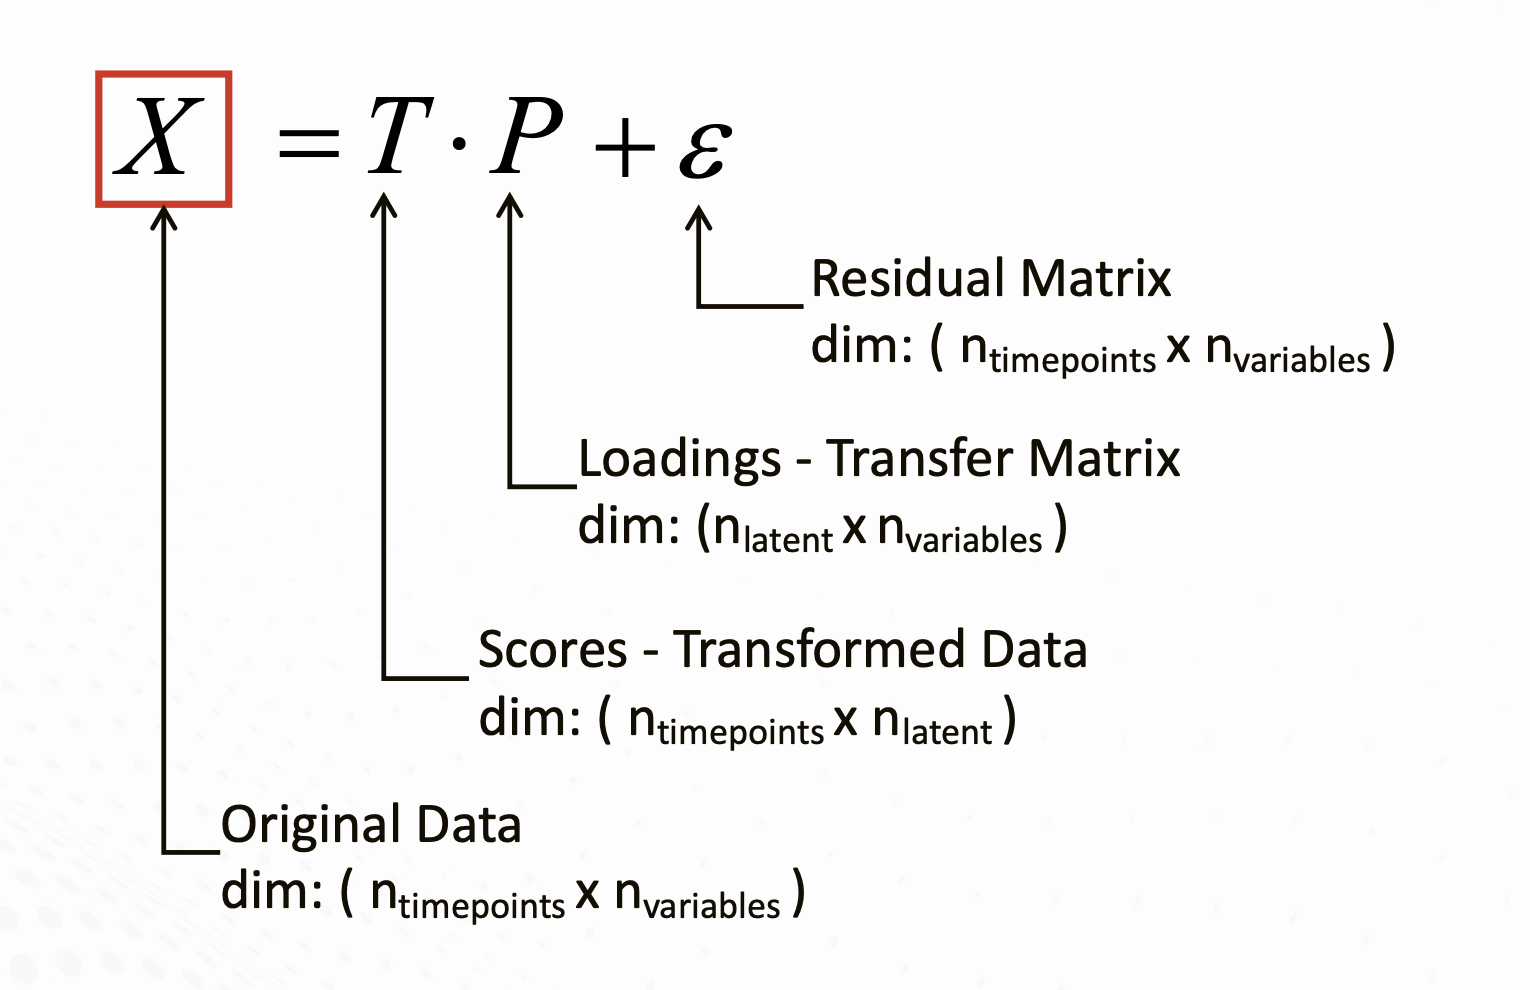

## Food Consumption Data

Use PCA to explore the differences between countries on their food consumption habits.

Source: Prosensus Course, Basel, 2014
Dataset available: http://openmv.net/info/food-consumption

In [23]:
url="http://openmv.net/file/food-consumption.csv"
food_cons_na=pd.read_csv(url,index_col=0)
food_cons_na

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11


### What are the options to deal with missing data?




In [24]:
food_cons = food_cons_na.fillna(food_cons_na.mean())
food_cons

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,90,49,88,19.0,57.000000,51,19,21,27,21,81,75,44,71,22,91,85,74,30.000000,26
Italy,82,10,60,2.0,55.000000,41,3,2,4,2,67,71,9,46,80,66,24,94,5.000000,18
France,88,42,63,4.0,76.000000,53,11,23,11,5,87,84,40,45,88,94,47,36,57.000000,3
Holland,96,62,98,32.0,62.000000,67,43,7,14,14,83,89,61,81,15,31,97,13,53.000000,15
Belgium,94,38,48,11.0,74.000000,37,23,9,13,12,76,76,42,57,29,84,80,83,20.000000,5
Luxembourg,97,61,86,28.0,79.000000,73,12,7,26,23,85,94,83,20,91,94,94,84,31.000000,24
England,27,86,99,22.0,91.000000,55,76,17,20,24,76,68,89,91,11,95,94,57,11.000000,28
Portugal,72,26,77,2.0,22.000000,34,1,5,20,3,22,51,8,16,89,65,78,92,6.000000,9
Austria,55,31,61,15.0,29.000000,33,1,5,15,11,49,42,14,41,51,51,72,28,13.000000,11


## Score and loading plot of PCA

1. Why do we see clusters of countries in the scoreplot?
2. How can we understand the differences between these clusters?

In [26]:
# Run PCA on data
foodpca = PCA()
foodpca.fit(food_cons)
foodpca_x = list(range(1,foodpca.n_components_+1))
food_components = foodpca.fit_transform(food_cons)

In [35]:
# Plot Explained Variance 
fig = px.line(x=foodpca_x, y=np.cumsum(foodpca.explained_variance_ratio_), color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color="Legend"))
fig.add_bar(x=foodpca_x, y=foodpca.explained_variance_ratio_, name="Individual explained variance")
fig.update_layout(width=1000)
fig.show()

In [29]:
""" Principal component on x-axis and y-axis """
PC_X_AXIS = 1
PC_Y_AXIS = 2

In [33]:
food_cons.index

Index(['Germany', 'Italy', 'France', 'Holland', 'Belgium', 'Luxembourg',
       'England', 'Portugal', 'Austria', 'Switzerland', 'Sweden', 'Denmark',
       'Norway', 'Finland', 'Spain', 'Ireland'],
      dtype='object', name='Country')

In [34]:
# Score plot of PCA
fig = px.scatter(x=food_components[:,PC_X_AXIS-1], y=food_components[:,PC_Y_AXIS-1],  title="PCA Score plot", labels={'x':"Principal Component - "+str(PC_X_AXIS), 'y':"Principal Component - "+str(PC_Y_AXIS)}, text=food_cons.index.get_level_values(0) ,hover_name=food_cons.index.get_level_values(0))    
fig.update_layout(width=1000,height=800)
fig.show()

In [43]:
# Loading plot of PCA
food_loadings = foodpca.components_.T * np.sqrt(foodpca.explained_variance_)
food_features = list(food_cons.columns)

fig = px.scatter(x=[0,0], y=[0,0], labels={'x':"Principal Component - "+str(PC_X_AXIS), 'y':"Principal Component - "+str(PC_Y_AXIS)}, title="PCA Loadings plot")
for i, feature in enumerate(food_features):
    #fig.add_shape(type='line', x0=0, y0=0, x1=owu_loadings[i, PC_X_AXIS-1], y1=owu_loadings[i, PC_Y_AXIS-1])
    fig.add_annotation(x=food_loadings[i, PC_X_AXIS-1], y=food_loadings[i, PC_Y_AXIS-1], ax=0, ay=0, xanchor="center", yanchor="bottom", text=feature)
fig.update_layout(width=1200)
fig.show()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Loadings of Principal Component - "+str(PC_X_AXIS),"Loadings of Principal Component - "+str(PC_Y_AXIS)))
fig.add_bar(x=food_features, y=food_loadings[:,PC_X_AXIS-1], row=1, col=1)
fig.add_bar(x=food_features, y=food_loadings[:,PC_Y_AXIS-1], row=1, col=2)
fig.update_layout(width=1200)
fig.show()


# Import or Generate Dataset InSilico Dataset

In the beginning of each notebook you can make a decision whether you run the notebooks with already pre-generated runs which will be just imported or you will generate your own doe dataset from insilico model. For further information about the process emulator for cell culture fed-batch processes, check the script "00_Process_Characterization.ipynb" or the Powerpoint presentation "Simplified InSilico Model.pptx".

* For dataset import set `select_dataset_source = "import"`.
* For generating data set `select_dataset_source = "generate"`.

For first time running the notebook, we recommend choosing the "import" option.

 

In [ ]:
""" Select dataset source, one of (import, generate) """
DATASET_SOURCE = "import"

In [ ]:
if DATASET_SOURCE == "import":
    # Define filename to import
    FILENAME = "owu.csv"
    FILEPATH = "/content/analytics-course-scripts/scripts/datasets/"
    # Import OWU data
    owu = pd.read_csv(FILEPATH+FILENAME,index_col=None, usecols = ["X:VCD", "X:Glc", "X:Lac", "X:Titer","W:Feed"])
    owu.index = pd.MultiIndex.from_product([list(range(int(len(owu)/15))),list(range(15))], names=["run","time"])
    # Import DOE data
    doe = pd.read_csv(FILEPATH+FILENAME.replace(".csv","_doe.csv"),index_col=None, usecols =["feed_start","feed_end","Glc_feed_rate","Glc_0","VCD_0"])

In [ ]:
if DATASET_SOURCE == "generate":
    # DOE Dataset definition (variable = [lower bound, upper bound]) 
    # Model parameters: Dictate the behaviour of the cell process
    MU_G_MAX = 0.05;
    MU_D_MAX = 0.025;
    K_G_GLC  = 1;
    K_I_LAC  = 30;
    K_D_LAC  = 50;
    K_GLC    = 0.04;
    K_LAC    = 0.06;
    K_PROD   = 1;
    # Process parameters: Conditions at which process is run
    FEED_START = [1, 4]
    FEED_END = [8, 12]
    GLC_FEED_RATE = [5, 20]
    GLC_0 = [10, 80.0]
    VCD_0 = [0.1, 1.0]
    # Number of experiments to generate
    NUM_RUNS = 40
    # Filename and filepath for the dataset 
    FILENAME = "owu.csv"
    FILEPATH = "/content/"
    # Collect parameters to dictionary
    VAR_LIMS = {"mu_g_max":MU_G_MAX, "mu_d_max": MU_D_MAX, "K_g_Glc" : K_G_GLC, "K_I_Lac" : K_I_LAC, "K_d_Lac" : K_D_LAC, "k_Glc" : K_GLC, "k_Lac" : K_LAC, "k_Prod" : K_PROD,
        "feed_start" : FEED_START,"feed_end" : FEED_END, "Glc_feed_rate" : GLC_FEED_RATE, "Glc_0" : GLC_0, "VCD_0" : VCD_0}
    # Generate Dataset
    data = simulator.generate_data(VAR_LIMS, NUM_RUNS, FILENAME)
    # Import DOE
    doe = pd.read_csv(FILEPATH+FILENAME.replace(".csv","_doe.csv"),index_col=None, usecols =["feed_start","feed_end","Glc_feed_rate","Glc_0","VCD_0"])
    # Import OWU
    owu = pd.read_csv(FILEPATH+FILENAME,index_col=None, usecols = ["X:VCD", "X:Glc", "X:Lac", "X:Titer","W:Feed"])
    owu.index = pd.MultiIndex.from_product([list(range(NUM_RUNS)),list(range(15))], names=["run","time"])

# Exploratory Analysis via PCA

*   Why is it important to visualize and understand the data, not only in univariate setting, but also in multivariate?
*   What insights can multivariate analysis provide?
*   What conclusions can be made from PCA on OWU matrix?
*   What conclusions can be made from PCA on BWU matrix?




## OWU and BWU Unfolding

First we need to distinguish between different type of variables and different types of unfolding.

Variable Types:

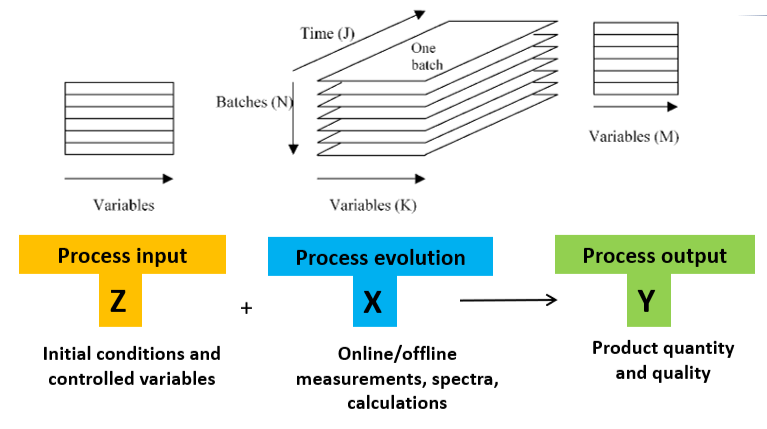

Unfolding types:

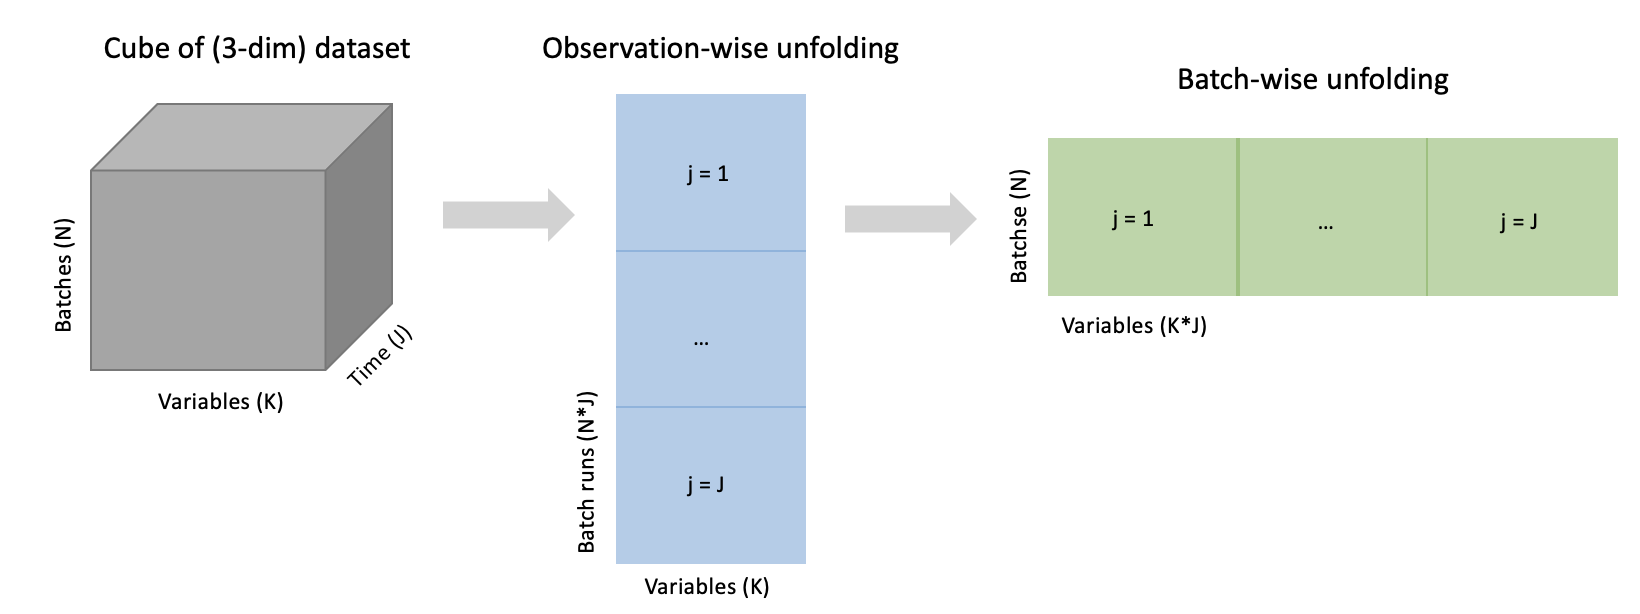

# PCA of OWU matrix

In this section, we use generated experiments using a Latin Hypercube design (LHD) from previous notebook. This will be used to create an observation-wise unfolder (OWU) matrix that will be analyzed using Principle Component Analysis (PCA).


### Visualize the OWU matrix

In the OWU matrix, the 1st column corresponds to VCD, the 2nd to glucose, the 3rd to lactate, the 4th to titer, and the 5th to the feed rate.


In [ ]:
owu

X:VCD      X:Glc       X:Lac      X:Titer  W:Feed
run time                                                       
0   0      0.550000  45.000000    0.000000     0.000000     0.0
    1      1.725244  44.008188    1.489389     0.054632     0.0
    2      4.779558  41.089619    5.872389     1.311539    12.5
    3     10.278397  40.271478   16.487303    15.870869    12.5
    4     15.886799  40.083603   35.542541    85.824621    12.5
...             ...        ...         ...          ...     ...
49  10     6.862589  66.962134  146.180650  1078.530371     0.0
    11     4.427064  73.787984  154.252563  1171.208118     0.0
    12     2.799119  70.388990  159.354590  1230.611358     0.0
    13     1.808446  68.216450  162.615752  1268.882113     0.0
    14     1.183911  66.803478  164.736779  1293.894036     0.0

[750 rows x 5 columns]


In the DOE matrix, the 1st column corresponds to feed_start, the 2nd to feed_end, the 3rd to Glc_feed_rate, the 4th to initial Glc, and the 5th to the initial VCD.

In [ ]:
doe

,feed_start,feed_end,Glc_feed_rate,Glc_0,VCD_0
0,2.500000,10.000000,12.500000,45.000000,0.550000
1,1.948980,10.244898,18.622449,40.714286,0.274490
2,3.295918,9.346939,14.642857,17.857143,0.127551
3,3.479592,9.020408,15.561224,47.857143,0.843878
4,1.459184,9.591837,7.295918,33.571429,0.421429
5,3.418367,9.265306,8.214286,45.000000,0.403061
6,1.153061,8.448980,17.091837,67.857143,0.862245
7,2.438776,8.122449,14.336735,10.714286,0.898980
8,2.744898,11.551020,9.132653,27.857143,0.292857
9,2.316327,9.183673,5.459184,75.000000,0.256122


### Plot correlation matrix

The OWU matrix is used to plot the degree of correlation between the different variables.

In [ ]:
fig = px.imshow(owu.corr())
fig.update_layout(title='Correlation Matrix among X variables')
fig.show()

### Unnormalized PCA

PCA is run on the OWU matrix, but without any variable normalization.



In [ ]:
""" Number of components for PCA"""
PCA_N_COMPONENTS = 5

In [ ]:
# Run PCA
owupca = PCA(n_components = PCA_N_COMPONENTS)
owupca.fit(owu)
owupca_x = list(range(1,owupca.n_components_+1))

In [ ]:
# Plot Explained Variance
fig = px.line(x=owupca_x, y=np.cumsum(owupca.explained_variance_ratio_), color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color="Legend"))
fig.add_bar(x=owupca_x, y=owupca.explained_variance_ratio_, name="Individual explained variance")
fig.show()

We can explain 99% of the variance with 1st principal component. Is that correct? Is something else incorrect about this analysis?

### Normalized PCA

PCA is run on the OWU matrix, but this time the variables are first normalized with respect to their mean and standard deviation. This ensures that each variable has equal contribution to the variance explained by the principal components


In [ ]:
# Scale data by mean and standard deviation
scaler = StandardScaler()
owu_normalized = scaler.fit_transform(owu)
# Run PCA on scaled data
owupca.fit(owu_normalized)
owupca_x = list(range(1,owupca.n_components_+1))
owu_components = owupca.fit_transform(owu_normalized)

In [ ]:
# Plot Explained Variance 
fig = px.line(x=owupca_x, y=np.cumsum(owupca.explained_variance_ratio_), color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color="Legend"))
fig.add_bar(x=owupca_x, y=owupca.explained_variance_ratio_, name="Individual explained variance")
fig.show()

### Plot scores and loadings

In the following plot, the PCA loadings are plotted together with the observation scores.

You can switch around which principal components are displayed on which axis by changing `select_x_pca` and `select_y_pca`

Here you can also apply same coloring options as in previous script. The options for `select_color` are:
* "Run_id" runs are colored by the order in which they appear in the dataset.
* "Time_id" runs are colored by the time evolution of the cell culture process.
* "Titer_14" runs are colored by the amount of Titer at day 14 or the experiments.
* "Glc_0" run are colored by the designed initial Glucose level
* "VCD_0" run are colored by the designed initial VCD level
* "feed_start" run are colored by the designed feeding start day 
* "feed_end" run are colored by the designed feeding end day
* "Glc_feed_rate" run are colored by the designed Glucose feed rate

In [ ]:
""" Principal component on x-axis and y-axis """
PC_X_AXIS = 1
PC_Y_AXIS = 2
""" Color points in plot by variable, one of (Titer_14,Time_id, Run_id, feed_start, feed_end, Glc_feed_rate, Glc_0, VCD_0)"""
PLOT_COLOR = "Time_id"
""" Highlight specific run in plot """
PLOT_RUN_ID = 0

In [ ]:
# Score plot of PCA
if PLOT_COLOR == "Run_id":
    color_idx=owu.index.get_level_values("run")
elif PLOT_COLOR == "Time_id":
    color_idx=owu.index.get_level_values("time")
elif PLOT_COLOR == "Titer_14":
    color_idx =np.repeat(np.array(owu["X:Titer"][:,14]),15)
elif PLOT_COLOR in doe.columns:
    color_idx = np.repeat(np.array(doe[PLOT_COLOR]),15)
else: 
    color_idx = None

fig = px.scatter(x=owu_components[:,PC_X_AXIS-1], y=owu_components[:,PC_Y_AXIS-1], color=color_idx, title="PCA Score plot", labels={'x':"Principal Component - "+str(PC_X_AXIS), 'y':"Principal Component - "+str(PC_Y_AXIS), 'color':str(PLOT_COLOR)}, hover_name=owu.index.get_level_values(0))    
if PLOT_RUN_ID is not None:
    fig.add_trace(go.Scatter(x=owu_components[owu.index.get_level_values(0) ==PLOT_RUN_ID,PC_X_AXIS-1],y=owu_components[owu.index.get_level_values(0) ==PLOT_RUN_ID,PC_Y_AXIS-1],name = "Run " +str(PLOT_RUN_ID)))
fig.show()

In [ ]:
# Loadings plot of PCA
owu_loadings = owupca.components_.T * np.sqrt(owupca.explained_variance_)
owu_features = list(owu.columns)

fig = px.scatter(x=[0,0], y=[0,0], labels={'x':"Principal Component - "+str(PC_X_AXIS), 'y':"Principal Component - "+str(PC_Y_AXIS)}, title="PCA Loadings plot")
for i, feature in enumerate(owu_features):
    fig.add_shape(type='line', x0=0, y0=0, x1=owu_loadings[i, PC_X_AXIS-1], y1=owu_loadings[i, PC_Y_AXIS-1])
    fig.add_annotation(x=owu_loadings[i, PC_X_AXIS-1], y=owu_loadings[i, PC_Y_AXIS-1], ax=0, ay=0, xanchor="center", yanchor="bottom", text=feature)
fig.show()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Loadings of Principal Component - "+str(PC_X_AXIS),"Loadings of Principal Component - "+str(PC_Y_AXIS)))
fig.add_bar(x=owu_features, y=owu_loadings[:,PC_X_AXIS-1], row=1, col=1)
fig.add_bar(x=owu_features, y=owu_loadings[:,PC_Y_AXIS-1], row=1, col=2)
fig.show()


In [ ]:
# Mahalanobis distance of observations (equal to the euclidean distance in PCA space)
owu_mahalanobis = EmpiricalCovariance().fit(owu_components).mahalanobis(owu_components)
T2threshold = chi2.ppf(0.95, owu_components.shape[1]-1)
fig = px.bar(x=list(range(len(owu_mahalanobis))),y=owu_mahalanobis, labels=dict(x="OWU Observation Id.", y="Mahalanobis distance", color="Run_id"), title="Mahalanobis distance with 95% Confidence Interval", color=owu.index.get_level_values(0), color_continuous_scale=px.colors.cyclical.HSV)
fig.add_hline(y=T2threshold)
fig.show()

# PCA of BWU matrix

In the BWU unfolding, the number of rows corresponds to individual experiment runs and each variable like `X:VCD` is unfolded into multiple variables over time, such as `X:VCD:0`, `X:VCD:1`, ..., `X:VCD:14` for each timestep it is measured.



### Visualize the BWU matrix

In the BWU matrix, the 1st column corresponds to VCD at day 0, the 2nd to glucose at day 0, the 3rd to lactate at day 0, the 4th to titer at day 0, and the 5th to the feed rate at day 0. This is repeated for day 1 and the following days. So, column 6 corresponds to VCD at day1, column 7 corresponds to Glc at day1, ..., column 11 corresponds to VCD at day2, etc.

In [ ]:
# Transform OWU to BWU
bwu = simulator.generate_bwu(owu)
target = simulator.generate_y(bwu)

In [ ]:
# Visualise BWU matrix
bwu

,X:VCD:0,X:VCD:1,X:VCD:2,X:VCD:3,X:VCD:4,X:VCD:5,X:VCD:6,X:VCD:7,X:VCD:8,X:VCD:9,...,W:Feed:5,W:Feed:6,W:Feed:7,W:Feed:8,W:Feed:9,W:Feed:10,W:Feed:11,W:Feed:12,W:Feed:13,W:Feed:14
0,0.550000,1.725244,4.779558,10.278397,15.886799,18.568089,18.099141,15.811653,12.920362,10.123559,...,12.500000,12.500000,12.500000,12.500000,12.500000,0.000000,0.0,0.0,0.0,0.0
1,0.274490,0.871876,2.589262,6.529319,12.160305,15.860577,15.657798,12.758719,8.910175,5.459967,...,18.622449,18.622449,18.622449,18.622449,18.622449,0.000000,0.0,0.0,0.0,0.0
2,0.127551,0.394527,1.182078,3.245514,7.422644,12.957409,16.940040,17.855081,16.416292,13.883034,...,14.642857,14.642857,14.642857,14.642857,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.843878,2.609587,6.769304,12.917048,17.673164,18.962614,17.510225,14.783900,11.821098,9.128513,...,15.561224,15.561224,15.561224,15.561224,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.421429,1.320115,3.754135,8.637166,14.486637,18.036687,18.229667,16.021779,11.657944,7.802797,...,7.295918,7.295918,7.295918,7.295918,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.403061,1.274492,3.663684,8.505169,14.369815,17.987947,18.241245,16.097973,12.237855,8.262851,...,8.214286,8.214286,8.214286,8.214286,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.862245,2.674991,6.822434,12.043234,14.253106,12.635555,9.337354,6.164561,3.814842,2.282810,...,17.091837,17.091837,17.091837,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.898980,2.561678,6.043656,10.256821,14.236500,15.979165,15.381042,13.451839,11.129528,8.774014,...,14.336735,14.336735,14.336735,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.292857,0.917564,2.680033,6.607004,12.290788,16.780218,18.032878,16.424653,12.328393,8.553837,...,9.132653,9.132653,9.132653,9.132653,9.132653,9.132653,0.0,0.0,0.0,0.0
9,0.256122,0.823632,2.468081,6.202015,11.450645,15.366139,16.636512,15.819700,13.819936,11.400472,...,5.459184,5.459184,5.459184,5.459184,0.000000,0.000000,0.0,0.0,0.0,0.0


### Plot correlation matrix
The BWU matrix is used to plot the degree of correlation between the different variables.


In [ ]:
# Plot correlation of BWU matrix
fig = px.imshow(bwu.corr())
fig.update_layout(title='BWU Correlation Matrix among X variables')
fig.show()

### Normalized PCA

PCA is run on the BWU matrix, bu this time the variables are first normalized with respect to their mean and standard deviation.


In [ ]:
""" Number of components for PCA"""
PCA_N_COMPONENTS = 15

In [ ]:
# Scale data by mean and standard deviation
scaler = StandardScaler()
bwu_normalized = scaler.fit_transform(bwu)
# Run PCA on scaled data
bwupca = PCA(n_components=min(min(bwu.shape),PCA_N_COMPONENTS))
bwupca.fit(bwu_normalized)
bwupca_x = list(range(1,bwupca.n_components_+1))
bwu_components = bwupca.fit_transform(bwu_normalized)

In [ ]:
# Plot Explained Variance 
fig = px.line(x=bwupca_x, y=np.cumsum(bwupca.explained_variance_ratio_), color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color="Legend"))
fig.add_bar(x=bwupca_x, y=bwupca.explained_variance_ratio_, name="Individual explained variance")
fig.show()

### Plot scores and loadings

In the following plot, the PCA loadings are plotted first with the loadings and then without.


In [ ]:
""" Principal component on x-axis and y-axis """
PC_X_AXIS = 1
PC_Y_AXIS = 2
""" Color points in plot by variable, one of (Titer_14, Run_id, feed_start, feed_end, Glc_feed_rate, Glc_0, VCD_0)"""
PLOT_COLOR = "Run_id"

In [ ]:
# Score plot of PCA
if PLOT_COLOR == "Run_id":
    color_idx=np.array(bwu.index.get_level_values(0))
elif PLOT_COLOR == "Titer_14":
    color_idx = np.array(owu["X:Titer"][:,14])
elif PLOT_COLOR in doe.columns:
    color_idx = np.array(doe[PLOT_COLOR])
else: 
    color_idx = None
fig = px.scatter(x=bwu_components[:,PC_X_AXIS-1], y=bwu_components[:,PC_Y_AXIS-1], color =color_idx, labels={'x':"Principal Component - "+str(PC_X_AXIS), 'y':"Principal Component - "+str(PC_Y_AXIS), 'color':str(PLOT_COLOR)}, title="PCA BWU Score plot")
fig.show()

In [ ]:
# Loadings plot of PCA
bwu_loadings = bwupca.components_.T * np.sqrt(bwupca.explained_variance_)
bwu_features = list(bwu.columns)

fig = px.scatter(x=[0,0], y=[0,0], labels={'x':"Principal Component - "+str(PC_X_AXIS), 'y':"Principal Component - "+str(PC_Y_AXIS)}, title="PCA Loadings plot")
for i, feature in enumerate(bwu_features):
    fig.add_shape(type='line', x0=0, y0=0, x1=bwu_loadings[i, PC_X_AXIS-1], y1=bwu_loadings[i, PC_Y_AXIS-1])
    fig.add_annotation(x=bwu_loadings[i, PC_X_AXIS-1], y=bwu_loadings[i, PC_Y_AXIS-1], ax=0, ay=0, xanchor="center", yanchor="bottom", text=feature)
fig.show()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Loadings of Principal Component - "+str(PC_X_AXIS),"Loadings of Principal Component - "+str(PC_Y_AXIS)))
fig.add_bar(x=bwu_features, y=bwu_loadings[:,PC_X_AXIS-1], row=1, col=1)
fig.add_bar(x=bwu_features, y=bwu_loadings[:,PC_Y_AXIS-1], row=1, col=2)
fig.show()


# Tasks: 
1. Compute Mahalanobis distances of the BWU matrix.
2. How would you use the pca analysis to find high Titer experiments.
3. Normalize data by overall median VCD, run-wise median VCD or time-wise VCD and run PCA on OWU matrix. (pick one)




